# GE Aviation
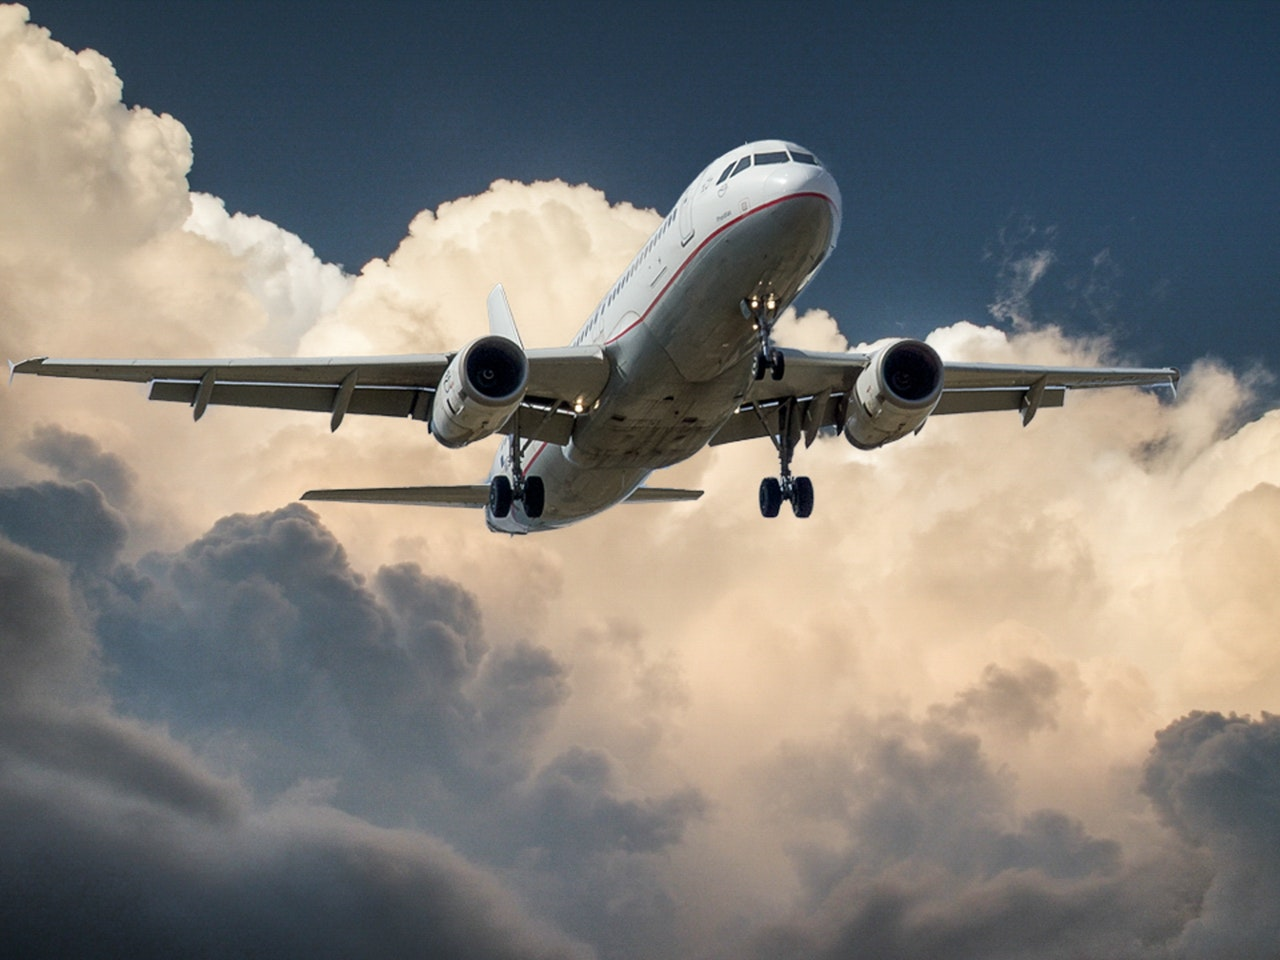

## Commercial Aviation Systems
With a broad range of avionics, power, and structures products, GE Aviation's Systems portfolio is bringing the future of flight to today's commercial aircraft.GE Aviation is the world leader in providing aircraft engines, systems and avionics.

###  Flight Data 
Columns 

dataset : Master data set for the case study 

esn: Engine serial unique number given for a specific engine  

unit: Engine unit number assigned to a given ESN

flight cycle : Several flight cycles are recorded for given ESN

datetime : Date and time when the engine measurements were taken

operator: unique code for a specific airline

depart_icao: code for the departure airport

destination_icao: code for the destination airport

hpc_eff_mod:High Pressure Compressor (HPC) efficiency modifier

hpc_flow_mod: High Pressure Compressor (HPC) flow modifier

tra: Throttle Resolver Angle 

t2: Total temperatura at fan inlet

t24: Total temperature at Low Presssure Compressor (LPC) outlet

t30: Total temperature at High Pressure Compressor (HPC) outlet

t50:Total temperature at Low Pressure Turbine (LPT) outlet

p2: Pressure at fan inlet

p15: Total pressure at High Pressure Compressor (HPC) outlet

p30: Total pressure at High Pressure Compressor (HPC) outlet

nf: Physical fan speed

nc: Physical core speed

epr: Engine pressure ratio(p30/p2)

ps30: Static pressure at HPC outlet

phi: Ratio of fuel flow to ps30

nrf:Corrected fan speed 

nrc: Corrected core speed

bpr: Bypass Ratio

farb:Burner fuel-air ratio

htbleed: Bleed Enthalpy

nf_dmd: Demand fan speed 

pcnfr_dmd: Demand corrected fan speed

w31: HPT coolant bleed

w32: LPT coolant bleed

In [1]:
import sys
import py4j
import warnings
import findspark
import pyspark
from functools import reduce
from threading import RLock
from pyspark import since
from pyspark.rdd import RDD
from datetime import datetime
from pyspark.sql import Row
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql import HiveContext, Row
from pyspark.sql import SQLContext, Row
from pyspark.sql.conf import RuntimeConfig
from pyspark.sql.dataframe import DataFrame
from pyspark.sql.pandas.conversion import SparkConversionMixin
from pyspark.sql.readwriter import DataFrameReader
from pyspark.sql.streaming import DataStreamReader

In [5]:
from pyspark.sql.types import *

struct1 = StructType([ 
  StructField("dataset",StringType(), True),
  StructField("esn", LongType(), True),
  StructField("unit", LongType(), True),
  StructField("flight_cycle",LongType(), True),
  StructField("datetime",TimestampType(), True),
  StructField("operator",StringType(), True),
  StructField("depart_icao",StringType(), True),
  StructField("destination_icao", StringType(), True),
  StructField("hpc_eff_mod", DoubleType(), True),
  StructField("hpc_flow_mod", DoubleType(), True),
  StructField('tra' , LongType(), True),
  StructField("t2", DoubleType(), True),
  StructField("t24", DoubleType(), True),
  StructField("t30", DoubleType(), True),
  StructField("t50", DoubleType(), True),
  StructField("p2", DoubleType(), True),
  StructField("p15", DoubleType(), True),
  StructField("p30", DoubleType(), True),
  StructField("nf", DoubleType(), True),
  StructField("nc", DoubleType(), True),
  StructField("epr", DoubleType(), True),
  StructField("ps30", DoubleType(), True),
  StructField("phi", DoubleType(), True),
  StructField("nrf", DoubleType(), True),
  StructField("bpr",  DoubleType(), True),
  StructField("farb",DoubleType(),True),
  StructField("htbleed", LongType(), True),
  StructField("nf_dmd", LongType(), True),
  StructField("pcnfr_dmd", LongType(), True),
  StructField("w31", DoubleType(), True),
  StructField("w32", DoubleType(), True)
])

In [6]:
flightData01 = spark.read.csv('../data/flight_data01.csv', schema=struct1, header='true', sep=',')

In [7]:
flightData01.cache()

DataFrame[dataset: string, esn: bigint, unit: bigint, flight_cycle: bigint, datetime: timestamp, operator: string, depart_icao: string, destination_icao: string, hpc_eff_mod: double, hpc_flow_mod: double, tra: bigint, t2: double, t24: double, t30: double, t50: double, p2: double, p15: double, p30: double, nf: double, nc: double, epr: double, ps30: double, phi: double, nrf: double, bpr: double, farb: double, htbleed: bigint, nf_dmd: bigint, pcnfr_dmd: bigint, w31: double, w32: double]

In [8]:
flightData01.printSchema()

root
 |-- dataset: string (nullable = true)
 |-- esn: long (nullable = true)
 |-- unit: long (nullable = true)
 |-- flight_cycle: long (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- operator: string (nullable = true)
 |-- depart_icao: string (nullable = true)
 |-- destination_icao: string (nullable = true)
 |-- hpc_eff_mod: double (nullable = true)
 |-- hpc_flow_mod: double (nullable = true)
 |-- tra: long (nullable = true)
 |-- t2: double (nullable = true)
 |-- t24: double (nullable = true)
 |-- t30: double (nullable = true)
 |-- t50: double (nullable = true)
 |-- p2: double (nullable = true)
 |-- p15: double (nullable = true)
 |-- p30: double (nullable = true)
 |-- nf: double (nullable = true)
 |-- nc: double (nullable = true)
 |-- epr: double (nullable = true)
 |-- ps30: double (nullable = true)
 |-- phi: double (nullable = true)
 |-- nrf: double (nullable = true)
 |-- bpr: double (nullable = true)
 |-- farb: double (nullable = true)
 |-- htbleed: long (nullable =

#### International Civil Aviation Organization (ICAO) airport codes

The ICAO airport code or location indicator is a four-letter alphanumeric code designating each airport around the world. These codes are defined by the International Civil Aviation Organization, and published in ICAO Document 7910: Location Indicators. The ICAO codes are used by air traffic control and airline operations such as flight planning. They are not the same as the IATA codes encountered by the general public, which are used for airline timetables, reservations, and baggage handling. For example, travellers who use London's Heathrow Airport will most likely be familiar with its IATA code: LHR. They are less likely, however, to be familiar with the ICAO code: EGLL. ICAO codes are also used to identify other locations such as weather stations, International Flight Service Stations or Area Control Centers, whether or not they are located at airports.

##### Four letter code for the departure airport:

VTBD - Don Mueang International Airport, Thailand(TH)

VTUV - Roi Et Airport, Thailand(TH)

VMMC - Macau International Airport in Macau, Macau(MO)

VTSP - Phuket International Airport in Phuket, Thailand(TH)

WSSS - Changi International Airport in Singapore, Singapore(SG)

WMKK - Kuala Lumpur International Airport in Sepang, Malaysia(MY)


##### Four letter code for the destination airport:

VTCC - Chiang Mai International Airport in Chiang Mai, Thailand(TH)

VOTR - Tiruchirapalli Airport in Tiruchirapally, India(IN)

VHHH - Chek Lap Kok Airport International Airport in Hong Kong, Hong Kong(HK)

WMKK - Kuala Lumpur International Airport in Sepang, Malaysia (MY)


In [9]:
flightData01.select('esn','unit','flight_cycle','datetime','operator','depart_icao', 'destination_icao','hpc_eff_mod','nf').show()

+------+----+------------+-------------------+--------+-----------+----------------+-----------+-------+
|   esn|unit|flight_cycle|           datetime|operator|depart_icao|destination_icao|hpc_eff_mod|     nf|
+------+----+------------+-------------------+--------+-----------+----------------+-----------+-------+
|999126|  26|           1|2017-12-31 18:33:07|     AXM|       VTBD|            VTUV|    -0.0027|2388.02|
|999126|  26|           2|2017-12-31 19:59:49|     AXM|       VTUV|            VTBD|    -0.0029|2387.96|
|999126|  26|           3|2017-12-31 21:44:38|     AXM|       VTBD|            VMMC|     8.0E-4|2387.99|
|999126|  26|           4|2018-01-01 00:50:02|     AXM|       VMMC|            VTBD|    -0.0026|2387.99|
|999126|  26|           5|2018-01-01 04:25:32|     AXM|       VTBD|            VTSP|      0.002|2388.01|
|999126|  26|           6|2018-01-01 06:25:56|     AXM|       VTSP|            VTBD|    -0.0032| 2388.0|
|999126|  26|           7|2018-01-01 08:37:05|     AXM|

In [10]:
from pyspark.sql.functions import max
flightData01.select(max("flight_cycle")).take(1)

[Row(max(flight_cycle)=303)]

In [11]:
flightData01.select("t24", "t30", "t50","p15","nf","nc").describe().show(5,vertical=True)

-RECORD 0-----------------------
 summary | count                
 t24     | 20126                
 t30     | 20126                
 t50     | 20126                
 p15     | 20126                
 nf      | 20126                
 nc      | 20126                
-RECORD 1-----------------------
 summary | mean                 
 t24     | 642.6167753155088    
 t30     | 1589.8316207890184   
 t50     | 1406.4295205207238   
 p15     | 21.609770446179468   
 nf      | 2388.090161979538    
 nc      | 9062.087397396292    
-RECORD 2-----------------------
 summary | stddev               
 t24     | 0.4808260034706172   
 t30     | 5.897978557298061    
 t50     | 6.696222555139711    
 p15     | 0.001497649693149102 
 nf      | 0.06976178524462295  
 nc      | 18.05199453267048    
-RECORD 3-----------------------
 summary | min                  
 t24     | 641.13               
 t30     | 1570.12              
 t50     | 1385.21              
 p15     | 21.6                 
 nf      |

In [12]:
struct2 = StructType([ 
  StructField("dataset",StringType(), True),
  StructField("esn", LongType(), True),
  StructField("unit", LongType(), True),
  StructField("flight_cycle",LongType(), True),
  StructField("datetime",TimestampType(), True),
  StructField("operator",StringType(), True),
  StructField("depart_icao",StringType(), True),
  StructField("destination_icao", StringType(), True),
  StructField("hpc_eff_mod", DoubleType(), True),
  StructField("hpc_flow_mod", DoubleType(), True),
  StructField('tra' , LongType(), True),
  StructField("t2", DoubleType(), True),
  StructField("t24", DoubleType(), True),
  StructField("t30", DoubleType(), True),
  StructField("t50", DoubleType(), True),
  StructField("p2", DoubleType(), True),
  StructField("p15", DoubleType(), True),
  StructField("p30", DoubleType(), True),
  StructField("nf", DoubleType(), True),
  StructField("nc", DoubleType(), True),
  StructField("epr", DoubleType(), True),
  StructField("ps30", DoubleType(), True),
  StructField("phi", DoubleType(), True),
  StructField("nrf", DoubleType(), True),
  StructField("bpr",  DoubleType(), True),
  StructField("farb",DoubleType(),True),
  StructField("htbleed", LongType(), True),
  StructField("nf_dmd", LongType(), True),
  StructField("pcnfr_dmd", LongType(), True),
  StructField("w31", DoubleType(), True),
  StructField("w32", DoubleType(), True)
])

In [13]:
flightData02 = spark.read.csv('../data/flight_data02.csv',schema=struct2, header='true', sep=',')

In [14]:
flightData02.cache()

DataFrame[dataset: string, esn: bigint, unit: bigint, flight_cycle: bigint, datetime: timestamp, operator: string, depart_icao: string, destination_icao: string, hpc_eff_mod: double, hpc_flow_mod: double, tra: bigint, t2: double, t24: double, t30: double, t50: double, p2: double, p15: double, p30: double, nf: double, nc: double, epr: double, ps30: double, phi: double, nrf: double, bpr: double, farb: double, htbleed: bigint, nf_dmd: bigint, pcnfr_dmd: bigint, w31: double, w32: double]

The Federal Aviation Administration (FAA) is an operating mode of the U.S. Department of Transportation.

Departure airport

KDEN - Denver International Airport in Denver, Colorado, United States(US)

Destination airport

KMSP - Minneapolis–Saint Paul International Airport,Minneapolis, Minnesota,United States(US)

KLAS -  Ambler Airport in Ambler, Alabama,United State(US)

KBIS - Bismarck Municipal Airport in Bismarck, North Dakota, United States(US)

KPHL -  Philadelphia International Airport in Philadelphia, Pennsylvania, United States(US)

KOKC - Rogers World Airport in Oklahoma City, Oklahoma, United States(US)

KSLS - Salt Lake City International Airport in Salt Lake City, Utah, United States(US)

KCVG - Cincinnati/Northern Kentucky Intl in Covington Ky/Cincinnati, Ohio, United States(US)

KIND - Indianapolis International Airport in Indianapolis, Indiana, United States(US)

KABQ - Albuquerque International Airport in Albuquerque, New Mexico, United States(US)

KONT - Ontario International Airport in Ontario, California, United States(US)

KTPA - Tampa International Airport in Tampa, Florida, United States(US)

MMUN - Cancún International Airport,Mexico,(MX)

MMSD - Los Cabos International Airport in San José del Cabo, Mexico,(MX)

KSFO - San Francisco International Airport in San Francisco, California, United States(US)


In [15]:
from pyspark.sql.functions import col
#Selecting the departures from Denver International Airport 
flightData02.where(col("depart_icao") == "KDEN")\
.select("esn","unit","flight_cycle","datetime","operator","depart_icao","destination_icao")\
.show()

+------+----+------------+-------------------+--------+-----------+----------------+
|   esn|unit|flight_cycle|           datetime|operator|depart_icao|destination_icao|
+------+----+------------+-------------------+--------+-----------+----------------+
|999129|  29|           8|2018-04-25 16:21:02|    FRON|       KDEN|            KMSP|
|999129|  29|          12|2018-04-26 12:13:48|    FRON|       KDEN|            KLAS|
|999129|  29|          14|2018-04-26 18:13:50|    FRON|       KDEN|            KBIS|
|999129|  29|          16|2018-04-27 01:42:19|    FRON|       KDEN|            KPHL|
|999129|  29|          19|2018-04-27 15:40:10|    FRON|       KDEN|            KOKC|
|999129|  29|          20|2018-04-27 18:14:22|    FRON|       KDEN|            KBIS|
|999129|  29|          22|2018-04-27 23:26:32|    FRON|       KDEN|            KSLC|
|999129|  29|          24|2018-04-28 08:20:55|    FRON|       KDEN|            KCVG|
|999129|  29|          25|2018-04-28 16:11:43|    FRON|       KDE

In [16]:
flightData02.select(max("flight_cycle")).take(1)

[Row(max(flight_cycle)=286)]

In [17]:
struct3 = StructType([ 
  StructField("dataset",StringType(), True),
  StructField("esn", LongType(), True),
  StructField("unit", LongType(), True),
  StructField("flight_cycle",LongType(), True),
  StructField("datetime",TimestampType(), True),
  StructField("operator",StringType(), True),
  StructField("depart_icao",StringType(), True),
  StructField("destination_icao", StringType(), True),
  StructField("hpc_eff_mod", DoubleType(), True),
  StructField("hpc_flow_mod", DoubleType(), True),
  StructField('tra' , LongType(), True),
  StructField("t2", DoubleType(), True),
  StructField("t24", DoubleType(), True),
  StructField("t30", DoubleType(), True),
  StructField("t50", DoubleType(), True),
  StructField("p2", DoubleType(), True),
  StructField("p15", DoubleType(), True),
  StructField("p30", DoubleType(), True),
  StructField("nf", DoubleType(), True),
  StructField("nc", DoubleType(), True),
  StructField("epr", DoubleType(), True),
  StructField("ps30", DoubleType(), True),
  StructField("phi", DoubleType(), True),
  StructField("nrf", DoubleType(), True),
  StructField("bpr",  DoubleType(), True),
  StructField("farb",DoubleType(),True),
  StructField("htbleed", LongType(), True),
  StructField("nf_dmd", LongType(), True),
  StructField("pcnfr_dmd", LongType(), True),
  StructField("w31", DoubleType(), True),
  StructField("w32", DoubleType(), True)
])

In [18]:
flightData03 = spark.read.csv('../data/flight_data03.csv', schema=struct3, header='true', sep=',')

In [19]:
flightData03.cache()

DataFrame[dataset: string, esn: bigint, unit: bigint, flight_cycle: bigint, datetime: timestamp, operator: string, depart_icao: string, destination_icao: string, hpc_eff_mod: double, hpc_flow_mod: double, tra: bigint, t2: double, t24: double, t30: double, t50: double, p2: double, p15: double, p30: double, nf: double, nc: double, epr: double, ps30: double, phi: double, nrf: double, bpr: double, farb: double, htbleed: bigint, nf_dmd: bigint, pcnfr_dmd: bigint, w31: double, w32: double]

Airworthiness Directive Status 

A critical document in the aircraft records is the current status of applicable Airworthiness Directives (AD’s) The summary document should list the status of all (AD’s) in chronological order by AD number. Ideally, the AD summary document should include the following information:

AD Aircraft, Engine, APU or Appliance S/N

AD Number & Effective Date

AD Description

AD Method of Compliance

AD Reference (i.e. Service Bulletin Number, Engineering Documentation)

AD Status (i.e. closed, open, N/A, etc.)

AD Initial & Repetitive Threshold (i.e. calendar months, flight hours, flight cycles)

AD Last Accomplishment (date, flight hours, flight cycles)

AD Next Accomplishment (date, flight hours, flight cycles, intervals remaining)

AD Remarks 

Aviation regulatory authorities (e.g. FAA and EASA) issue airworthiness directives when a specific condition has been discovered to exist on an aircraft. If this condition is not corrected, the safety of the aircraft could be jeopardized.

Aircraft in Service

From its very first flight, an aircraft progressively accumulates flying hours, flight cycles (a takeoff to landing is one flight cycle) and naturally elapsed calendar periods. These variables are tracked to ensure that the requirements of the Maintenance Programme are met. The latter may be termed Block or Equalised Maintenance.


 Flight cycle

An engine flight cycle is the predicted average flight profile of engine parameters and effects representative of the way the engine is expected to operate in service. 

Turbine engine inspection and component replacement intervals as mandated by the Federation Aviation Administration  are based on flight hours and engine cycles.

By earlier definition, one complete cycle contains all of the following three events:

an engine start,

a takeoff and landing (for the purpose of discussing cycles, a takeoff is always followed by a landing and thus both count as one event),

a shutdown.

Full Cycle Test 

This method requires the engine to be run through the exact sequences of thrust or power settings for the period of time identified in the engine flight cycle. One complete cycle of a full cycle test involves the exact number of operating hours as a typical engine flight cycle and includes engine start and shutdown. 

In [20]:
from pyspark.sql.functions import desc
flightData03\
.groupBy("esn","unit","datetime","operator","depart_icao","destination_icao")\
.sum("flight_cycle")\
.withColumnRenamed("sum(flight_cycle)", "flight_cycle_total")\
.sort(desc("flight_cycle_total"))\
.limit(20)\
.show()

+------+----+-------------------+--------+-----------+----------------+------------------+
|   esn|unit|           datetime|operator|depart_icao|destination_icao|flight_cycle_total|
+------+----+-------------------+--------+-----------+----------------+------------------+
|999092|  92|2018-02-06 07:55:00|     AIC|       VABB|            VOTV|               545|
|999069|  69|2018-02-07 15:50:00|     AIC|       VTBS|            VEBS|               497|
|999069|  69|2018-02-04 15:44:00|     AIC|       VTBS|            VICG|               445|
|999059|  59|2018-01-29 03:39:00|     AIC|       VIDP|            VOBL|               441|
|999059|  59|2018-01-23 15:56:00|     AIC|       VTBS|            VICG|               347|
|999069|  69|2018-02-18 08:05:00|     AIC|       VECC|            VIDP|               334|
|999069|  69|2018-02-18 05:41:31|     AIC|       VIDP|            VECC|               333|
|999069|  69|2018-02-18 04:41:00|     AIC|       VIDP|            VECC|               332|

In [21]:
struct4 = StructType([ 
  StructField("dataset",StringType(), True),
  StructField("esn", LongType(), True),
  StructField("unit", LongType(), True),
  StructField("flight_cycle",LongType(), True),
  StructField("datetime",TimestampType(), True),
  StructField("operator",StringType(), True),
  StructField("depart_icao",StringType(), True),
  StructField("destination_icao", StringType(), True),
  StructField("hpc_eff_mod", DoubleType(), True),
  StructField("hpc_flow_mod", DoubleType(), True),
  StructField('tra' , LongType(), True),
  StructField("t2", DoubleType(), True),
  StructField("t24", DoubleType(), True),
  StructField("t30", DoubleType(), True),
  StructField("t50", DoubleType(), True),
  StructField("p2", DoubleType(), True),
  StructField("p15", DoubleType(), True),
  StructField("p30", DoubleType(), True),
  StructField("nf", DoubleType(), True),
  StructField("nc", DoubleType(), True),
  StructField("epr", DoubleType(), True),
  StructField("ps30", DoubleType(), True),
  StructField("phi", DoubleType(), True),
  StructField("nrf", DoubleType(), True),
  StructField("bpr",  DoubleType(), True),
  StructField("farb",DoubleType(),True),
  StructField("htbleed", LongType(), True),
  StructField("nf_dmd", LongType(), True),
  StructField("pcnfr_dmd", LongType(), True),
  StructField("w31", DoubleType(), True),
  StructField("w32", DoubleType(), True)
])

In [22]:
flightData04 = spark.read.csv('../data/flight_data04.csv', schema=struct3, header='true', sep=',')

In [23]:
flightData04.cache()

DataFrame[dataset: string, esn: bigint, unit: bigint, flight_cycle: bigint, datetime: timestamp, operator: string, depart_icao: string, destination_icao: string, hpc_eff_mod: double, hpc_flow_mod: double, tra: bigint, t2: double, t24: double, t30: double, t50: double, p2: double, p15: double, p30: double, nf: double, nc: double, epr: double, ps30: double, phi: double, nrf: double, bpr: double, farb: double, htbleed: bigint, nf_dmd: bigint, pcnfr_dmd: bigint, w31: double, w32: double]

In [24]:
flightData04.select("esn","unit","flight_cycle","datetime","operator","depart_icao","destination_icao").show()

+------+----+------------+-------------------+--------+-----------+----------------+
|   esn|unit|flight_cycle|           datetime|operator|depart_icao|destination_icao|
+------+----+------------+-------------------+--------+-----------+----------------+
|999056|  56|           1|2018-01-01 06:33:13|     PGT|       LTBJ|            LTCR|
|999056|  56|           2|2018-01-01 09:40:21|     PGT|       LTCR|            LTBJ|
|999056|  56|           3|2018-01-01 12:23:01|     PGT|       LTBJ|            LTFJ|
|999056|  56|           4|2018-01-01 14:11:10|     PGT|       LTFJ|            LTCG|
|999056|  56|           5|2018-01-01 21:10:50|     PGT|       LTCG|            LTFJ|
|999056|  56|           6|2018-01-02 00:09:11|     PGT|       LTFJ|            LTCN|
|999056|  56|           7|2018-01-02 02:00:11|     PGT|       LTCN|            LTFJ|
|999056|  56|           8|2018-01-02 04:18:22|     PGT|       LTFJ|            LTCE|
|999056|  56|           9|2018-01-02 06:28:19|     PGT|       LTC

LTFJ - Sabiha Gokcen International in Istanbul/Pendik,Turkey(TR)

LTAC - Esenboga in Ankara, Turkey(TR)

LTAI - Aiport Antalya Civ-Mil in Antaya,Turkey(TR).

LTBJ - Adnan Menderes in Izmir, Turkey(TR)

LTCG - Trabzon Air Base in Trabzon, Turkey(TR)

LTAF - Adana in Adana, Turkey(TR)

LTAU - Erkilet International Airport in Kayseri, Turkey(TR)

LTBS - Dalaman in Dalaman, Turkey(TR)

LTAN - Mil-Civ in Konya, Turkey(TR)

The number of 217 departures Sabiha Gokcen International in Istanbul/Pendik,Turkey with the arrival to Esenboga in Ankara, Turkey.

In [25]:
flightData04\
.groupBy("depart_icao","destination_icao")\
.count()\
.orderBy(desc("count"))\
.limit(20)\
.show()

+-----------+----------------+-----+
|depart_icao|destination_icao|count|
+-----------+----------------+-----+
|       LTFJ|            LTAC|  217|
|       LTFJ|            LTAI|  180|
|       LTAC|            LTFJ|  177|
|       LTFJ|            LTBJ|  161|
|       LTAI|            LTFJ|  155|
|       LTFJ|            LTCG|  141|
|       LTBJ|            LTFJ|  134|
|       LTCG|            LTFJ|  129|
|       LTAF|            LTFJ|  117|
|       LTFJ|            LTAF|  117|
|       LTFJ|            LTAU|  115|
|       LTAU|            LTFJ|   97|
|       LTFJ|            LTBS|   89|
|       LTFE|            LTFJ|   85|
|       LTFJ|            LTFE|   84|
|       LTFJ|            LTAJ|   81|
|       LTFJ|            LTAN|   79|
|       LTBS|            LTFJ|   79|
|       LTFJ|            LFPO|   79|
|       LTAN|            LTFJ|   78|
+-----------+----------------+-----+



Manufacturing Data

Columns

esn: Engine Serial Number

pn: 3 parts represented in this dataset

sn: Unique serial number for a given part

vsstream: Supply chain value stream for part, 3 represented in this dataset

In [26]:
struct5 = StructType([ 
  StructField("esn", LongType(), True),
  StructField("pn",StringType(), True),
  StructField("sn", LongType(), True),
  StructField("vstream",StringType(), True)
])

In [27]:
manufacturingData05 = spark.read.csv('../data/manufacturing_data.csv', schema=struct5, header='true', sep=',')

In [28]:
manufacturingData05.cache()

DataFrame[esn: bigint, pn: string, sn: bigint, vstream: string]

In [29]:
manufacturingData05.printSchema()

root
 |-- esn: long (nullable = true)
 |-- pn: string (nullable = true)
 |-- sn: long (nullable = true)
 |-- vstream: string (nullable = true)



In [30]:
manufacturingData05.show()

+------+--------+----------+-------+
|   esn|      pn|        sn|vstream|
+------+--------+----------+-------+
|999010|54321P01| 822106416| shroud|
|999010|54321P01| 664475698| shroud|
|999010|54321P01|2430976214| shroud|
|999010|54321P01|1277358392| shroud|
|999010|54321P01|8668054501| shroud|
|999010|54321P01|8701192851| shroud|
|999010|54321P01|1184168310| shroud|
|999010|54321P01|7441727173| shroud|
|999010|54321P01|3925781607| shroud|
|999010|54321P01|1487332503| shroud|
|999010|54321P01|2044257581| shroud|
|999010|54321P01|9597083692| shroud|
|999010|54321P01|5242248869| shroud|
|999010|54321P01|1287551775| shroud|
|999010|54321P01|8756257308| shroud|
|999010|54321P01|6927776132| shroud|
|999010|54321P01|1590863358| shroud|
|999010|54321P01|9039234936| shroud|
|999010|54321P01|1286402429| shroud|
|999010|54321P01| 541013756| shroud|
+------+--------+----------+-------+
only showing top 20 rows



Remaining Useful Life

Remaining useful life is the length of time a machine is likely to
operate before it requires repair or replacement. 
Within this case study, RUL is depicted as the number of cycles remaining until the engine needs to be overhauled. It can be determined algorithmically based on assumed wear of life limiting parts (which is what we will be doing) or via inspection. The RUL assigned to the ESN is the number of operational cycles after the last cycle that the engine will continue to operate.

In [31]:
struct6 = StructType([ 
  StructField("esn", LongType(), True),
  StructField("rul", LongType(), True)
])

In [32]:
rulData06 =  spark.read.csv('../data/av_esn_rul_data.csv', schema=struct6, header='true', sep=',')

In [33]:
rulData06.printSchema()
rulData06.show(5)

root
 |-- esn: long (nullable = true)
 |-- rul: long (nullable = true)

+------+---+
|   esn|rul|
+------+---+
|999175|123|
|999197| 95|
|999123|141|
|999122|122|
|999126|162|
+------+---+
only showing top 5 rows



Working with SQL
Transforming DataFrame into a table

In [34]:
flightData01.createOrReplaceTempView("flightData01Table")

In [35]:
sqlCount = spark.sql("""
SELECT destination_icao, count(DISTINCT depart_icao) as num_distinct_departure_airport
FROM flightData01Table
GROUP BY destination_icao
ORDER BY count(DISTINCT depart_icao) DESC
LIMIT 5
""")
sqlCount.show()

+----------------+------------------------------+
|destination_icao|num_distinct_departure_airport|
+----------------+------------------------------+
|            WMKK|                            62|
|            VTBD|                            27|
|            WSSS|                             4|
|            WMKP|                             4|
|            VVTS|                             3|
+----------------+------------------------------+



In [36]:
sqlCountDestination = spark.sql("""
SELECT depart_icao, count(depart_icao) as number_departure_airport
FROM flightData01Table
GROUP BY depart_icao
ORDER BY count(depart_icao) DESC
LIMIT 5
""")
sqlCountDestination.show()

+-----------+------------------------+
|depart_icao|number_departure_airport|
+-----------+------------------------+
|       WMKK|                    8286|
|       VTBD|                    3424|
|       VHHH|                     546|
|       VVTS|                     452|
|       VTSP|                     444|
+-----------+------------------------+



In [37]:
maxSql = spark.sql("""
SELECT destination_icao, sum(flight_cycle) as flight_cycle_total
FROM flightData01Table
GROUP BY destination_icao
ORDER BY sum(flight_cycle) DESC
LIMIT 6
""")
maxSql.show()

+----------------+------------------+
|destination_icao|flight_cycle_total|
+----------------+------------------+
|            WMKK|            587610|
|            VTBD|            226786|
|            VHHH|             78068|
|            VMMC|             55616|
|            VVTS|             49410|
|            VTSP|             40166|
+----------------+------------------+



In [38]:
numberSql = spark.sql("""
SELECT esn,unit,depart_icao,destination_icao, count(destination_icao) AS number_destination_airport FROM flightData01Table
GROUP BY GROUPING SETS ((esn,unit,depart_icao, destination_icao), (esn),(unit),(depart_icao), (destination_icao))
""")
numberSql.show()

+------+----+-----------+----------------+--------------------------+
|   esn|unit|depart_icao|destination_icao|number_destination_airport|
+------+----+-----------+----------------+--------------------------+
|999114|  14|       WMKK|            VMMC|                         2|
|999107|   7|       WMKK|            WIII|                         8|
|999064|  64|       WMKK|            VTBD|                        14|
|999149|  49|       WBGR|            WMKK|                        24|
|999055|  55|       WMKK|            WBKK|                        12|
|999049|  49|       WMKK|            VYYY|                        30|
|999160|  60|       WMKK|            WMKN|                         4|
|999002|   2|       WMKK|            VTBD|                        10|
|999165|  65|       WMKK|            VTSG|                         4|
|999164|  64|       VHHH|            VTBD|                        18|
|999055|  55|       WBGR|            WMKK|                        10|
|999049|  49|       

In [39]:
flightData02.createOrReplaceTempView("flightData02Table")

In [40]:
sqlDF = spark.sql("SELECT esn,unit,flight_cycle,operator,depart_icao,destination_icao, pcnfr_dmd,nf_dmd,w31,w32 FROM flightData02Table")
sqlDF.show(5)

+------+----+------------+--------+-----------+----------------+---------+------+-----+-----+
|   esn|unit|flight_cycle|operator|depart_icao|destination_icao|pcnfr_dmd|nf_dmd|  w31|  w32|
+------+----+------------+--------+-----------+----------------+---------+------+-----+-----+
|999050|  50|           1|    FRON|       KMCO|            KMSY|     2388|   393|100.0| 38.8|
|999050|  50|           2|    FRON|       KMSY|            KSAT|     2388|   392|100.0|38.99|
|999050|  50|           3|    FRON|       KMSY|            KSAT|     2388|   393|100.0|38.91|
|999050|  50|           4|    FRON|       KSAT|            KSAN|     2388|   393|100.0|38.95|
|999050|  50|           5|    FRON|       KSAT|            KSAN|     2388|   392|100.0|38.83|
+------+----+------------+--------+-----------+----------------+---------+------+-----+-----+
only showing top 5 rows



In [41]:
sqlCount = spark.sql("""
SELECT  depart_icao,destination_icao, count(depart_icao) AS count
FROM flightData02Table
GROUP BY GROUPING SETS ((depart_icao, destination_icao),(depart_icao), (destination_icao), ())
""")
sqlCount.show()

+-----------+----------------+-----+
|depart_icao|destination_icao|count|
+-----------+----------------+-----+
|       KMSN|            KMCO|   10|
|       KBIS|            KDEN|    5|
|       KMSP|            KRSW|   11|
|       KMSP|            KTTN|    4|
|       KSAT|            KATL|    2|
|       EDHI|            CYYR|    2|
|       KLAS|            KTPA|   28|
|       KRDU|            KMCO|   17|
|       KBUF|            KMIA|   19|
|       KMCO|            KRSW|    4|
|       KDEN|            KCMH|    5|
|       KLAS|            KSJC|   41|
|       KMCO|            KSAN|   47|
|       MMUN|            KDEN|    2|
|       KPHX|            KORD|    3|
|       KBNA|            KLAS|   17|
|       KLAS|            KSAN|    2|
|       KMIA|            KBUF|   19|
|       KDEN|            KLAS|  155|
|       KJAX|            KDEN|   10|
+-----------+----------------+-----+
only showing top 20 rows



In [42]:
flightData03.createOrReplaceTempView("flightData03Table")

In [43]:
functionWhereSQL = spark.sql("""
SELECT flight_cycle,operator,depart_icao, destination_icao, hpc_eff_mod 
FROM flightData03Table
WHERE hpc_eff_mod >= 0.0051 AND hpc_eff_mod >= 0.0064
ORDER BY flight_cycle ASC
""")
functionWhereSQL.show()

+------------+--------+-----------+----------------+-----------+
|flight_cycle|operator|depart_icao|destination_icao|hpc_eff_mod|
+------------+--------+-----------+----------------+-----------+
|           2|     AIC|       VIDP|            VOBL|     0.0072|
|          23|     AIC|       VAPO|            VIDP|     0.0064|
|          40|     AIC|       VABB|            VIDP|     0.0072|
|          67|     AIC|       VOBL|            VECC|     0.0064|
|          69|     AIC|       VRMM|            VOTV|     0.0072|
|          82|     AIC|       VIDP|            OERK|     0.0076|
|          88|     AIC|       VOTV|            OERK|     0.0074|
|          99|     AIC|       OERK|            VOCI|     0.0072|
|         104|     AIC|       WSSS|            VIDP|     0.0066|
|         109|     AIC|       OERK|            VABB|     0.0064|
|         135|     AIC|       VIDP|            VAPO|     0.0074|
|         260|     AIC|       VIDP|            VOTV|     0.0074|
+------------+--------+--

Joining Tables and Selecting Features

Hamburg Finkenwerder Airport is a midsized airport in Hamburg, Germany.
The airport has one runway: 5/23 The ICAO designator of this field is EDHI and it's IATA code is XFW. Nearby other airfields are Fischbek Airfield, Hamburg Airport, Uetersen/Heist Airport, Ahrenlohe Airport and Boberg Airfield.

In [44]:
# Selecting rows that have matching values in both relation
innerJoinSQL = spark.sql(""" 
SELECT  flightData02Table.esn,flightData02Table.unit,flightData02Table.flight_cycle,flightData02Table.datetime,flightData02Table.operator,flightData02Table.depart_icao,flightData02Table.destination_icao
FROM flightData01Table INNER JOIN flightData02Table ON flightData01Table.unit = flightData02Table.unit
LIMIT 10
""")
innerJoinSQL.show()

+------+----+------------+-------------------+--------+-----------+----------------+
|   esn|unit|flight_cycle|           datetime|operator|depart_icao|destination_icao|
+------+----+------------+-------------------+--------+-----------+----------------+
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDHI|            CYYR|
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDHI|            CYYR|
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDHI|            CYYR|
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDHI|            CYYR|
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDHI|            CYYR|
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDHI|            CYYR|
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDHI|            CYYR|
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDHI|            CYYR|
|999129|  29|           1|2018-04-20 09:50:12|    FRON|       EDH

In [45]:
relationsJoinSQL = spark.sql(""" 
SELECT  flightData02Table.esn,flightData02Table.unit,flightData02Table.flight_cycle,flightData02Table.datetime,flightData02Table.operator,flightData02Table.depart_icao
FROM flightData02Table INNER JOIN flightData03Table ON flightData02Table.unit = flightData03Table.unit
LIMIT 10
""")
relationsJoinSQL.show()

+------+----+------------+-------------------+--------+-----------+
|   esn|unit|flight_cycle|           datetime|operator|depart_icao|
+------+----+------------+-------------------+--------+-----------+
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
|999061|  61|           1|2018-01-06 18:38:26|    FRON|       KSAT|
+------+----+------------+-------------------+--------+-----------+



In [46]:
#Selecting all values from the left relation and the matched values from the right relation
leftJoinSQL = spark.sql(""" 
SELECT flightData02Table.esn,flightData02Table.unit,flightData02Table.flight_cycle,flightData02Table.datetime,flightData02Table.operator,flightData02Table.depart_icao
FROM flightData02Table LEFT JOIN flightData03Table ON flightData02Table.unit = flightData03Table.unit
LIMIT 10
""")
leftJoinSQL.show()

+------+----+------------+-------------------+--------+-----------+
|   esn|unit|flight_cycle|           datetime|operator|depart_icao|
+------+----+------------+-------------------+--------+-----------+
|999050|  50|           1|2018-01-06 06:01:09|    FRON|       KMCO|
|999050|  50|           2|2018-01-06 07:41:00|    FRON|       KMSY|
|999050|  50|           3|2018-01-06 08:41:18|    FRON|       KMSY|
|999050|  50|           4|2018-01-06 10:14:00|    FRON|       KSAT|
|999050|  50|           5|2018-01-06 11:12:52|    FRON|       KSAT|
|999050|  50|           6|2018-01-06 14:21:00|    FRON|       KSAN|
|999050|  50|           7|2018-01-06 15:20:55|    FRON|       KSAN|
|999050|  50|           8|2018-01-06 18:38:26|    FRON|       KSAT|
|999050|  50|           9|2018-01-06 20:46:00|    FRON|       KMSY|
|999050|  50|          10|2018-01-07 06:20:00|    FRON|       KMCO|
+------+----+------------+-------------------+--------+-----------+



References

https://airportsbase.org/ICAO.php

https://metar-taf.com/airport/EDHI

https://skybrary.aero/articles/airworthiness-system


https://www.faa.gov/documentLibrary/media/Advisory_Circular/AC33-90-1.pdf

http://www.aircraftmonitor.com/uploads/1/5/9/9/15993320/redelivery_considerations_in_acft_op_leases___v1.pdf

